In [19]:
# Import Required Libraries
import requests      #send request to HTML page
import bs4
from bs4 import BeautifulSoup     #python library for extracting data

from fake_useragent import UserAgent

import pandas as pd                       #Further Analysis of the extracted Data
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Initialization of the lists to store the extracted data
# The data that we extract is unstructured data. So we’ll create empty lists to store them in a structured form,
count=0                  # Intialize search row count
products=[]              #List to store name of the product
prices=[]                #List to store price of the product
cpu = []                 #List to store Internal Memory specifications of the product
ram = []                 #List to store RAM specifications of the product
fc = []                  #List to store front camera specifications of the product
rc = []                  #List to store rear camera specifications of the product
display = []             #List to store Screen Size specifications of the product
battery = []             # List to store Battery capacity 
processor = []           # List to store Processor type 
supc = []                # List to store SUPC spec

df=pd.DataFrame()        #Initialize Dataframe            

In [21]:
# Find Elements by ID
#To extract data from multiple pages of the product listing we’re going to use a for loop.
# The range will specify the number of pages to be extracted

url = "https://www.snapdeal.com/products/mobiles-mobile-phones/?sort=plrty" 

### Finding mobiles url from main snapdeal site & Mobile Brand

In [22]:
user_agent = UserAgent() # Dummy User Agent
print(user_agent)
url = "https://www.snapdeal.com/products/mobiles-mobile-phones/?sort=plrty" 
## Getting the reponse from the page using get method of requests module
page = requests.get(url,headers = {"user_agent":user_agent.chrome})
html = page.content
page_soup = bs4.BeautifulSoup(html, "html.parser")

# Based on Brand on Snapdeal filtering all mobile data  and capturing their specifications 
# getting all href links 

list_of_urls = []

for a in page_soup.find_all('a', href=True):
    # Brand filtering 
    if 'Brand' in a['href']:
        page_brand = requests.get(a['href'],headers = {"user_agent":user_agent.chrome})
        html_brand = page_brand.content
        page_soup_brand = bs4.BeautifulSoup(html_brand, "html.parser")
        
        # Capture Individual mobile links for Brand 
        # getting all href links
        
        for a in page_soup_brand.find_all('a', href=True):
            if 'product' in a['href'] and 'filter' not in a['href'] and 'https' in a['href'] and 'mobiles' not in a['href'] and 'digital-entertainment' not in a['href'] and 'women-apparel' not in a['href'] :
                #print ("Found the URL:", a['href'])
                list_of_urls.append(a['href'])
        
list_of_urls = set(list_of_urls)
print (list_of_urls)    
print (len(list_of_urls))

{'https://www.snapdeal.com/product/oppo-cph1931-64gb-3-gb/6917529660392121940', 'https://www.snapdeal.com/product/redmi-note-9-128gb-4/8070451152245613611', 'https://www.snapdeal.com/product/oppo-reno-2z-256gb-8/5764608195566549096', 'https://www.snapdeal.com/product/redmi-9-64gb-4-gb/6917529692785652221', 'https://www.snapdeal.com/product/realme-realme-6i-64gb-6/621229228108', 'https://www.snapdeal.com/product/oppo-cph2083-32gb-3-gb/5764608184528797477', 'https://www.snapdeal.com/product/oppo-a53-64gb-4-gb/5764608189019936786', 'https://www.snapdeal.com/product/realme-narzo-20-pro-64gb/625140726659', 'https://www.snapdeal.com/product/ziox-doupix-f9-16gb-1/8070451211923739156', 'https://www.snapdeal.com/product/oppo-reno3-pro-256gb-8/5764608200121129902', 'https://www.snapdeal.com/product/oppo-a53-128gb-6-gb/5764608197128415377', 'https://www.snapdeal.com/product/oppo-f17-128gb-6-gb/8070451191286842469', 'https://www.snapdeal.com/product/realme-c12-32gb-3-gb/6917529683526386566', 'http

### Capturing specifications from Mobile page 

In [23]:
list_of_urls = list(list_of_urls)      
for href in list_of_urls:                
    page_mobile = requests.get(href,headers = {"user_agent":user_agent.chrome})
    html_mobile = page_mobile.content
    page_soup_mobile = bs4.BeautifulSoup(html_mobile, "html.parser")

    #Extracting Product name     
    name = page_soup_mobile.find_all('title')[0].get_text()
    print (name)
    try:
        products.append(name)
    except:
        products.append("NA")
        
    
    # Extracting Price of Mobile 
    try:
        price = page_soup_mobile.find("div",{"class":'row reset-margin'}).find("span",{"class":"payBlkBig"}).get_text()
        price = int(price)
        prices.append(price)
    except:
        print ("check this product getting price is 0",name)
        prices.append(0) 
    
    
    #  Extracting other specs
    dict1 = {}
    try:    
        for ele in page_soup_mobile.find("div",{"class":"spec-body p-keyfeatures"}).find_all("li"):
            #print (ele)
            x = [ele.find_all("span")[2].get_text()]
            print (x)
    
            try:
                k,v = x[0].split(':')
                dict1[k] = v                        
                print (k, dict1[k])
            except (ValueError):
                print ("skip")
    except:
        print ("no product specs found")



    # Add Internal Memory specifications to list
    try:
        #temp = dict1['Internal Memory']
        #temp.replace(r'GB','')
        cpu.append(dict1['Internal Memory'])
    except:
        cpu.append(0)
            
    # Add RAM specifications to list
    try:
        ram.append(dict1['RAM'])
    except:
        ram.append(0)
        
    # Add front camera specifications to list
    try:
        fc.append(dict1['Front Camera'])
    except:
        fc.append(0)
                 
    # Add Rear Camera specifications to list
    try:
        rc.append(dict1['Rear Camera'])
    except:
        rc.append(0)
            
                
    # Add Display specifications to list
    try:
        display.append(dict1['Screen Size (in cm)'])
    except:
        display.append(0)


    # Add Battery Capacity to list
    try:
        battery.append(dict1['Battery Capacity (in mAh)'])
    except:
        battery.append(0)

    # Add Core Processor to list
    try:
        processor.append(dict1['Processor Cores'])
    except:
        processor.append(0)


    # Add Core Processor to list
    try:
        supc.append(dict1['SUPC'])
    except:
        supc.append(0)


    
    count=count+1 # Increment row count
    
## Create a dataframe with structured data from all searched rows
print ("product, price, cpu, fc, rc, ram, display,battery,processor,supc",len(products),len(prices), len(cpu), len(fc), len(rc), len(ram), len(display),len(battery), len(processor), len(supc))    
df = pd.DataFrame({'Product Name':products,'Internal Memory in GB':cpu,'RAM in GB':ram,'Front Camera in MP':fc,"Rear Camera in MP":rc,'Screen Size in cms':display,'Price in INR':prices,'Battery Capacity mAh':battery,'Processor Type':processor,'SUPC':supc})
print (df.head())


#print('No. of rows searched',count)


Oppo A5 2020 ( 64GB , 3 GB ) Black Mobile Phones Online at Low Prices | Snapdeal India

['RAM:3 GB']
RAM 3 GB
['Screen Size (in cm):16.51 cm (6.5)']
Screen Size (in cm) 16.51 cm (6.5)
['Rear Camera:48 MP']
Rear Camera 48 MP
['Front Camera:16 MP']
Front Camera 16 MP
['Internal Memory:64GB']
Internal Memory 64GB
['Battery Capacity (in mAh):5000 mAh Battery large battery']
Battery Capacity (in mAh) 5000 mAh Battery large battery
['Processor Cores:Octa']
Processor Cores Octa
['SUPC: SDL975805367']
SUPC  SDL975805367
Redmi Note 9 ( 128GB , 4 GB ) White Mobile Phones Online at Low Prices | Snapdeal India

['RAM:4 GB']
RAM 4 GB
['Screen Size (in cm):16.51 cm (6.5)']
Screen Size (in cm) 16.51 cm (6.5)
['Rear Camera:48 MP']
Rear Camera 48 MP
['Front Camera:13 MP']
Front Camera 13 MP
['Internal Memory:128GB']
Internal Memory 128GB
['Battery Capacity (in mAh):5020']
Battery Capacity (in mAh) 5020
['Processor Cores:Octa']
Processor Cores Octa
['SUPC: SDL121399291']
SUPC  SDL121399291
Oppo Reno 2z 

Oppo F15 ( 128GB , 4 GB ) Blazing Blue Mobile Phones Online at Low Prices | Snapdeal India

['RAM:4 GB']
RAM 4 GB
['Screen Size (in cm):16.25 cm (6.4)']
Screen Size (in cm) 16.25 cm (6.4)
['Rear Camera:48M+8M+2M+2M']
Rear Camera 48M+8M+2M+2M
['Front Camera:16 MP']
Front Camera 16 MP
['Internal Memory:128GB']
Internal Memory 128GB
['Battery Capacity (in mAh):4000mAh']
Battery Capacity (in mAh) 4000mAh
['Processor Cores:Octa']
Processor Cores Octa
['SUPC: SDL284440138']
SUPC  SDL284440138
Redmi Note 9 Pro ( 128GB , 4 GB ) Aurora Blue Mobile Phones Online at Low Prices | Snapdeal India

['RAM:4 GB']
RAM 4 GB
['Screen Size (in cm):17 cm (6.7)']
Screen Size (in cm) 17 cm (6.7)
['Rear Camera:48MP+8MP+2MP+2MP']
Rear Camera 48MP+8MP+2MP+2MP
['Front Camera:16 MP']
Front Camera 16 MP
['Internal Memory:128GB']
Internal Memory 128GB
['Battery Capacity (in mAh):5035 mAh']
Battery Capacity (in mAh) 5035 mAh
['Processor Cores:Octa']
Processor Cores Octa
['SUPC: SDL100688673']
SUPC  SDL100688673
Realm

Redmi 9 ( 128GB , 4 GB ) Carbon Black Mobile Phones Online at Low Prices | Snapdeal India

['RAM:4 GB']
RAM 4 GB
['Screen Size (in cm):16.256 cm (6.4)']
Screen Size (in cm) 16.256 cm (6.4)
['Rear Camera:5 MP']
Rear Camera 5 MP
['Front Camera:5 MP']
Front Camera 5 MP
['Internal Memory:128GB']
Internal Memory 128GB
['Battery Capacity (in mAh):5000']
Battery Capacity (in mAh) 5000
['Processor Cores:Octa']
Processor Cores Octa
['SUPC: SDL146388178']
SUPC  SDL146388178
Realme C12 ( 32GB , 3 GB ) Silver Mobile Phones Online at Low Prices | Snapdeal India

['RAM:3 GB']
RAM 3 GB
['Screen Size (in cm):16.51 cm (6.5)']
Screen Size (in cm) 16.51 cm (6.5)
['Rear Camera:13 MP']
Rear Camera 13 MP
['Front Camera:5 MP']
Front Camera 5 MP
['Internal Memory:32GB']
Internal Memory 32GB
['Battery Capacity (in mAh):6000']
Battery Capacity (in mAh) 6000
['Processor Cores:Octa']
Processor Cores Octa
['SUPC: SDL330332973']
SUPC  SDL330332973
Oppo F19 Pro ( 128GB , 8 GB ) Crystal Silver Mobile Phones Online at

Redmi 9A ( 32GB , 2 GB ) Blue Mobile Phones Online at Low Prices | Snapdeal India

['RAM:2 GB']
RAM 2 GB
['Screen Size (in cm):16.51 cm (6.5)']
Screen Size (in cm) 16.51 cm (6.5)
['Rear Camera:13 MP']
Rear Camera 13 MP
['Front Camera:5 MP']
Front Camera 5 MP
['Internal Memory:32GB']
Internal Memory 32GB
['Battery Capacity (in mAh):5000']
Battery Capacity (in mAh) 5000
['Processor Cores:Octa']
Processor Cores Octa
['SUPC: SDL674852415']
SUPC  SDL674852415
Oppo Reno 3 Pro ( 128GB , 8 GB ) Midnight Black Mobile Phones Online at Low Prices | Snapdeal India

['RAM:8 GB']
RAM 8 GB
['Screen Size (in cm):16.4 cm (6.44)']
Screen Size (in cm) 16.4 cm (6.44)
['Rear Camera:64MP + 13MP + 8MP + 2MP']
Rear Camera 64MP + 13MP + 8MP + 2MP
['Front Camera:44MP+2MP']
Front Camera 44MP+2MP
['Internal Memory:128GB']
Internal Memory 128GB
['Battery Capacity (in mAh):4025 mAh']
Battery Capacity (in mAh) 4025 mAh
['Processor Cores:Quad']
Processor Cores Quad
['SUPC: SDL082304514']
SUPC  SDL082304514
Realme C11

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Product Name           65 non-null     object
 1   Internal Memory in GB  65 non-null     object
 2   RAM in GB              65 non-null     object
 3   Front Camera in MP     65 non-null     object
 4   Rear Camera in MP      65 non-null     object
 5   Screen Size in cms     65 non-null     object
 6   Price in INR           65 non-null     int64 
 7   Battery Capacity mAh   65 non-null     object
 8   Processor Type         65 non-null     object
 9   SUPC                   65 non-null     object
dtypes: int64(1), object(9)
memory usage: 5.2+ KB


In [25]:
df.describe() # Describe Data before cleaning and dtype conversion

,Price in INR
count,65.000000
mean,13316.153846
std,7189.451294
min,3099.000000
25%,8990.000000
50%,11599.000000
75%,15299.000000
max,34990.000000


In [26]:
df.iloc[:,6]= df.iloc[:,6].astype(float).copy()

In [27]:
df.describe()

,Price in INR
count,65.000000
mean,13316.153846
std,7189.451294
min,3099.000000
25%,8990.000000
50%,11599.000000
75%,15299.000000
max,34990.000000


###  Storing DataFrame to Excel/CSV file 

In [43]:
df.to_excel(r'snapdealData_Capstone.xlsx', index = False)

In [44]:
df.to_csv(r'snapdealData_CapstoneProject1.csv', index = False)

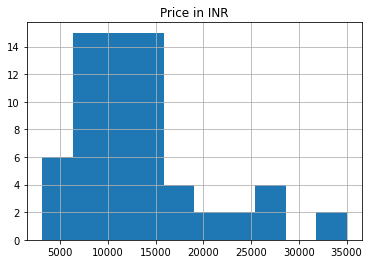

In [32]:
# Plot Histograms of Price and Rating
df.hist()
plt.show()

### Observation from Histogram -- Major phones are below 20-25k

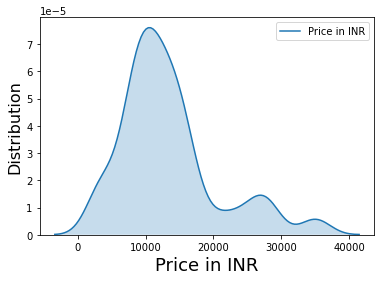

In [35]:
sns.kdeplot(df['Price in INR'],shade=True)
plt.xlabel('Price in INR', fontsize=18)
plt.ylabel('Distribution', fontsize=16)
plt.show()

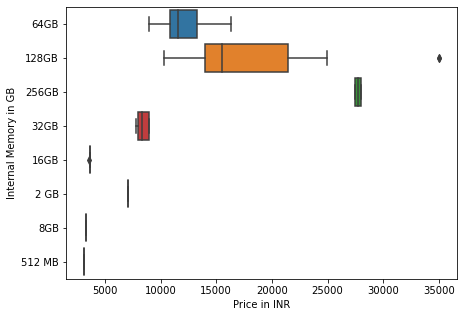

In [38]:
# Bivariate Analysis
# Box plot of Internal Memory and Price
plt.figure(figsize=(7,5))
sns.boxplot(y="Internal Memory in GB",x='Price in INR',data=df)
plt.show()

### Observation : Memory increase results in Price Increase 

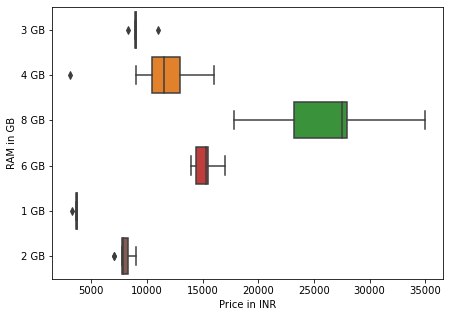

In [46]:
# Bivariate Analysis
# Box plot of RAM in GB and Price
plt.figure(figsize=(7,5))
sns.boxplot(y="RAM in GB",x='Price in INR',data=df)
plt.show()

 - Observation:  RAM increase Results in Price Increase 

### In General  RAM, Memory, Camera specs directly effects Price 
### 90% Phones are below 20K price 
### Major Brands on Snapdeal are Oppo, Realme, Readme ..